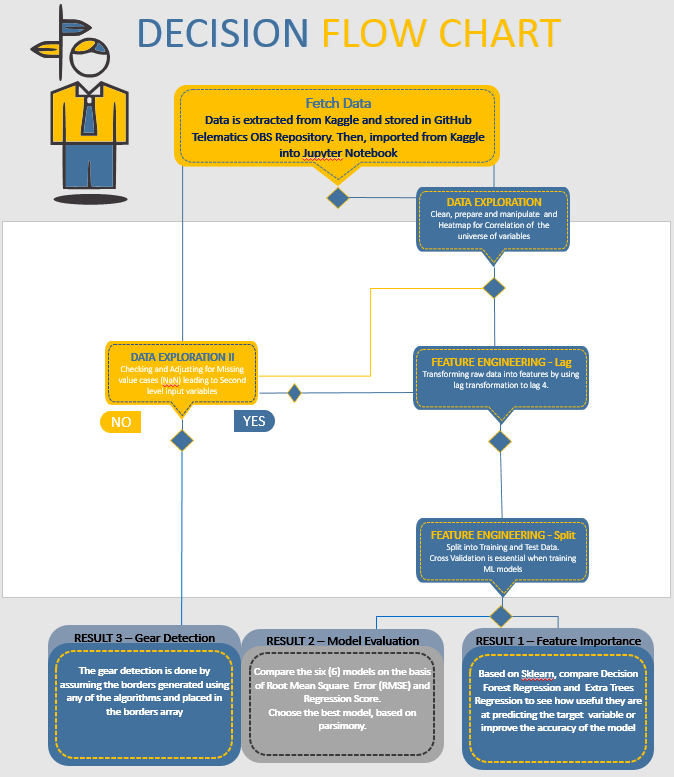

In [4]:
from IPython.display import Image
Image(filename='OBS-Flowchart.png')

In [3]:
#Setting It Up
#I collected all of the data above and combined them into one dataframe.
#First, we will import the libraries we will be using and also load our data into a Pandas dataframe.

# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import seaborn as sn
import sklearn

# Python magic to show plots inline in the notebook
%matplotlib inline
plt.style.use('ggplot')
import datetime as dt
from datetime import datetime
import math

In [5]:
# Import data
df = pd.read_csv("https://raw.githubusercontent.com/Preetinsights/Telematic-OBS-Gear-Prediction/master/allcars.csv")

In [7]:
#It is a good practice to understand the data first and try to gather as many insights from it. 
#EDA is all about making sense of data in hand,before getting them dirty with it.

#1. Check for Missing Data
#2. Summary statistics for measures of location and dispersion
#3. Heatmap for Correlations for Data Structure
#4. Establish a basis to uncover a parsimonious model, one which explains the data with a minimum number of predictor variables.

#...display the first 5 records in the data...#
df.head()

,Unnamed: 0,Unnamed: 0.1,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
0,117459,184,28:21.0,0,0f18fe2806d00210bf030fc1fe0ebffe0ec0fd10c0ff0e...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,117460,185,28:22.0,0,0f48fe400660fe0dc1ff0ebfff0fc0010ebefd0dc0010f...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,117461,186,28:23.0,0,0ef8fe300678fe0ebfff0ec0030fc0ff0dc1000fc0000e...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,117462,187,28:24.0,0,0f20fe2806d8ff0cc0ff0dc2000fc1ff0ec1010dbe000e...,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,117463,188,28:25.0,0,0f50fe800678fe10c0000ec0000ec0000ebf0110c00010...,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [8]:
#data atributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106460 entries, 0 to 106459
Data columns (total 19 columns):
Unnamed: 0      106460 non-null int64
Unnamed: 0.1    106460 non-null int64
timeStamp       106460 non-null object
tripID          106460 non-null int64
accData         106460 non-null object
gps_speed       106460 non-null float64
battery         106460 non-null float64
cTemp           106460 non-null float64
dtc             106460 non-null float64
eLoad           106460 non-null float64
iat             106460 non-null float64
imap            106460 non-null float64
kpl             106460 non-null float64
maf             106460 non-null float64
rpm             106460 non-null float64
speed           106460 non-null float64
tAdv            106460 non-null float64
tPos            106460 non-null float64
deviceID        106460 non-null int64
dtypes: float64(13), int64(4), object(2)
memory usage: 15.4+ MB


In [9]:
#Check for Missing Data
df.isnull().values.any()

False

In [11]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(0, 19)

In [12]:
#### Drop cells with NaN
df = df.dropna(axis=0,subset=['cTemp'])
df = df.dropna(axis=0,subset=['dtc'])
df = df.dropna(axis=0,subset=['iat'])
df = df.dropna(axis=0,subset=['imap'])
df = df.dropna(axis=0,subset=['tAdv'])

In [13]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)].shape

(0, 19)

In [14]:
#summary statistics
df.describe()

,Unnamed: 0,Unnamed: 0.1,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,106460.000000,106460.000000,106460.000000,106460.000000,106460.0,106460.000000,106460.0,106460.000000,106460.000000,106460.000000,106460.0,106460.0,106460.000000,106460.000000,106460.0,106460.0,106460.0
mean,170703.476893,53428.476893,63.697849,18.222948,0.0,64.143575,0.0,35.477576,31.122901,96.442175,0.0,0.0,1183.945900,33.075089,0.0,0.0,2.0
std,30732.539133,30732.539133,38.719864,18.727147,0.0,29.107386,0.0,22.502089,15.797552,47.344598,0.0,0.0,759.576518,33.972104,0.0,0.0,0.0
min,117459.000000,184.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,2.0
25%,144088.750000,26813.750000,25.000000,0.000000,0.0,60.000000,0.0,22.352941,24.000000,97.000000,0.0,0.0,800.750000,0.000000,0.0,0.0,2.0
50%,170703.500000,53428.500000,60.000000,13.600000,0.0,80.000000,0.0,38.823529,34.000000,99.000000,0.0,0.0,1167.750000,25.000000,0.0,0.0,2.0
75%,197318.250000,80043.250000,99.000000,27.800000,0.0,81.000000,0.0,48.235294,43.000000,110.000000,0.0,0.0,1733.500000,50.000000,0.0,0.0,2.0
max,223933.000000,106658.000000,126.000000,82.100000,0.0,84.000000,0.0,94.901961,58.000000,221.000000,0.0,0.0,3566.000000,149.000000,0.0,0.0,2.0


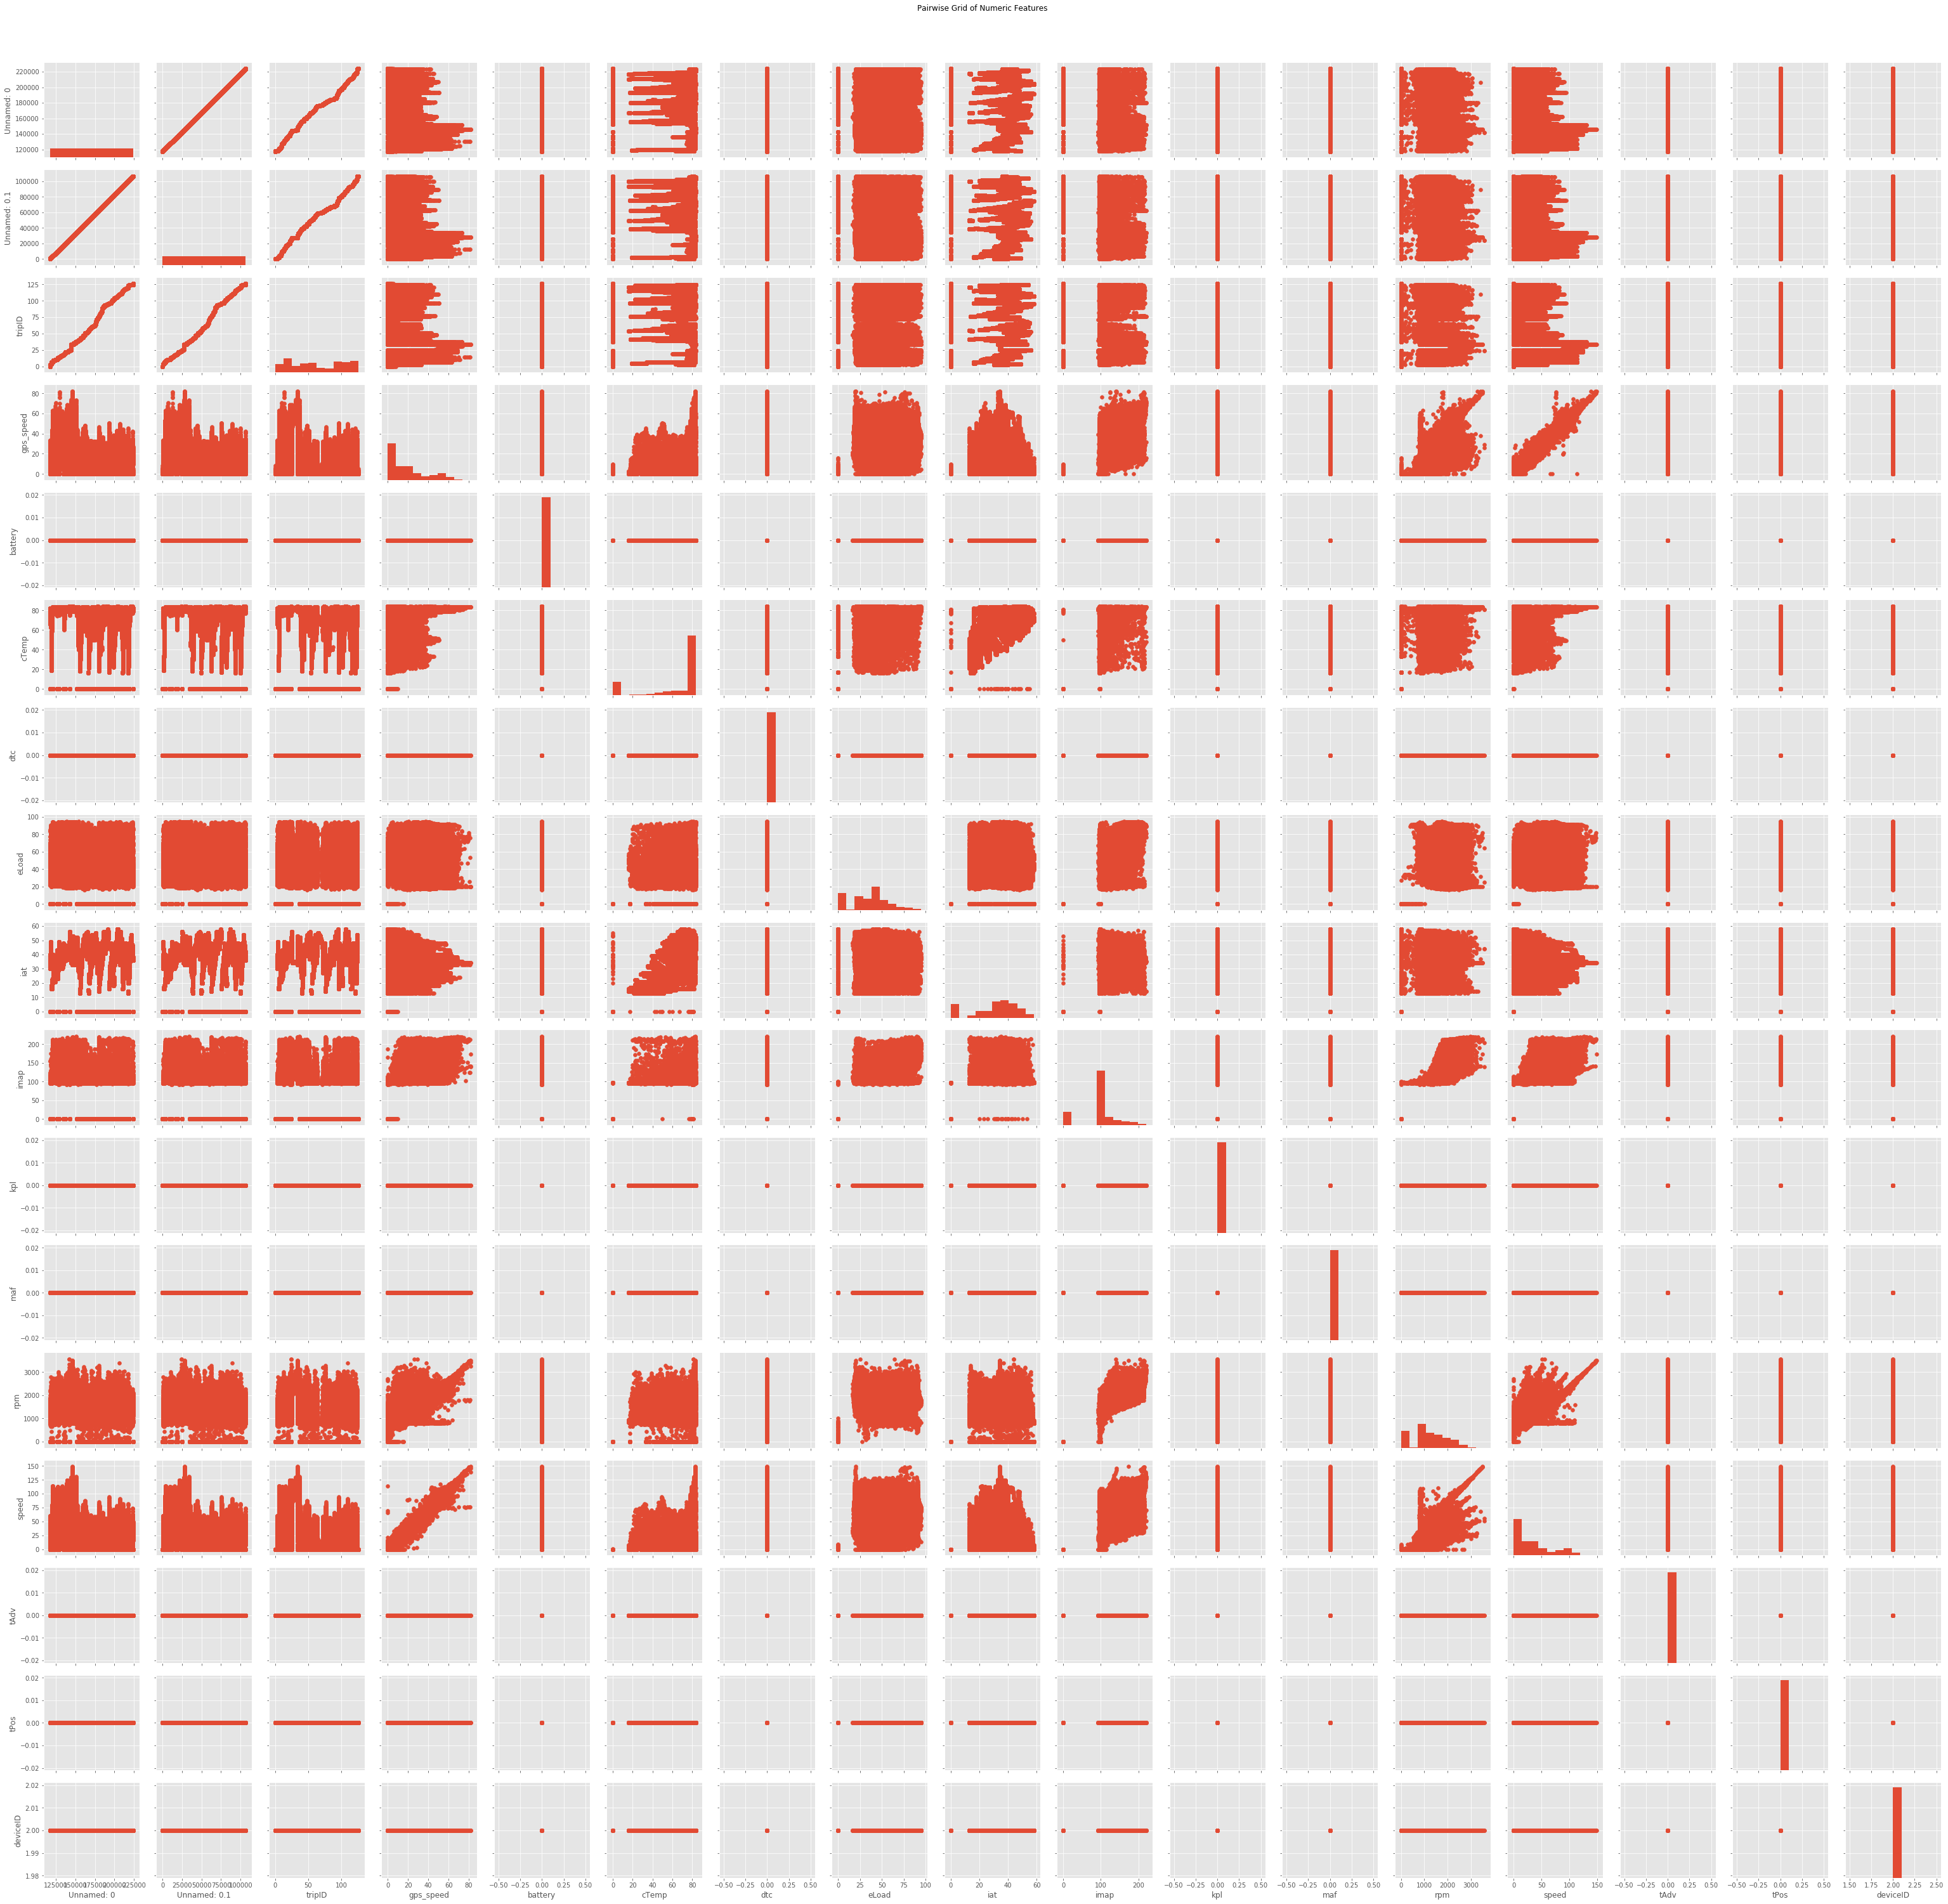

In [15]:
# Seaborn doesn't handle NaN values, so we can fill them with 0 for now.
df = df.fillna(value=0)
# Pair grid of key variables.
g = sns.PairGrid(df)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

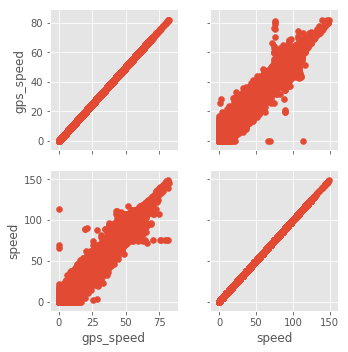

In [16]:
g = sns.PairGrid(df, vars=["gps_speed", "speed"])
g = g.map(plt.scatter)

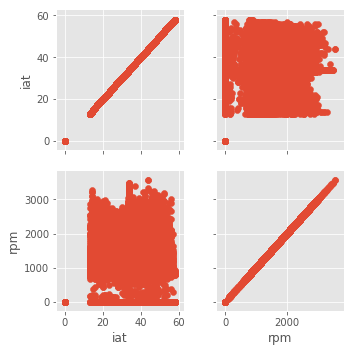

In [17]:
g = sns.PairGrid(df, vars=["iat", "rpm"])
g = g.map(plt.scatter)
#iat is in-board automatic transmission
#rpm = revolution per minute

Text(0.5,1,'Correlation Heatmap of Numeric Features')

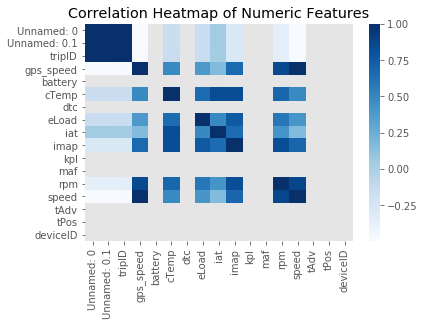

In [18]:
#To use linear regression for modelling,its necessary to remove correlated variables to improve your model.
#One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap='Blues')
plt.title('Correlation Heatmap of Numeric Features')

In [19]:
#Select variables with complete dataset (no nan or zero)
df1 = pd.DataFrame(df,columns=['tripID','gps_speed','cTemp','eLoad','iat','imap','rpm','speed'])

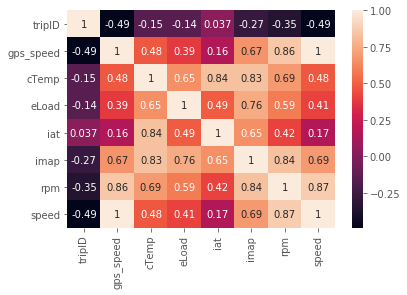

In [20]:
#Remove correlated variables before feature selection.
corrMatrix = df1.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#Here, it can be infered that IAT – In-dash automatic transmission “iat” has strong positive correlation with circular temperature “cTemp”

In [21]:
#Make final dataset
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'timeStamp', 'tripID', 'accData',
       'gps_speed', 'battery', 'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl',
       'maf', 'rpm', 'speed', 'tAdv', 'tPos', 'deviceID'],
      dtype='object')

In [22]:
cols = df.columns.tolist()

In [25]:
df1.to_csv('allcars.csv')

In [26]:
df1.dtypes

tripID         int64
gps_speed    float64
cTemp        float64
eLoad        float64
iat          float64
imap         float64
rpm          float64
speed        float64
dtype: object

In [27]:
# FEATURE ENGINEERING
# Define custom function to create lag values
#Feature Engineering
#Currently our dataframe isn’t exactly what we need. This is because our machine learning algorithms only learn row by row and aren’t aware of other rows when learning or making predictions. We can overcome this challenge by imputing previous time value, or lags, into our data.
#After some trial and error, I determined that 4 lags (or 4 months) work best. The code below creates a function that will create 4 lags for each feature in the ‘features’ list. Our new dataframe now has 41 columns!
#...Lag Transformation is an FE technique...#, seconded by Feature Split
def feature_lag(features):
    for feature in features:
        df[feature + '-lag1'] = df[feature].shift(1)
        df[feature + '-lag2'] = df[feature].shift(2)
        df[feature + '-lag3'] = df[feature].shift(3)
        df[feature + '-lag4'] = df[feature].shift(4)

# Define columns to create lags for
features = ['tripID','gps_speed','cTemp','eLoad','iat','imap','rpm','speed']

# Call custom function
feature_lag(features)

#Feature engineering is the process of transforming raw data into features 
#that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. 
#Feature engineering turn your inputs into things the algorithm can understand

In [28]:
#predict gps speed 3, 6, and 12 months ahead.
df1['y3'] = df.gps_speed.shift(-3)
df1['y6'] = df.gps_speed.shift(-6)
df1['y12'] = df.gps_speed.shift(-12)

In [29]:
df1 = df1.dropna(axis=0,subset=['y3'])
df1 = df1.dropna(axis=0,subset=['y6'])
df1 = df1.dropna(axis=0,subset=['y12'])

In [30]:
df1.dtypes

tripID         int64
gps_speed    float64
cTemp        float64
eLoad        float64
iat          float64
imap         float64
rpm          float64
speed        float64
y3           float64
y6           float64
y12          float64
dtype: object

In [31]:
#Split into Training and Test Data
#Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

y = df1['gps_speed']

In [32]:
X = df1.drop(['gps_speed'], axis=1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [34]:
X_train.shape, y_train.shape

((74513, 10), (74513,))

In [35]:
X_test.shape, y_test.shape

((31935, 10), (31935,))

In [36]:
X.columns

Index(['tripID', 'cTemp', 'eLoad', 'iat', 'imap', 'rpm', 'speed', 'y3', 'y6',
       'y12'],
      dtype='object')

In [37]:
df1.dtypes

tripID         int64
gps_speed    float64
cTemp        float64
eLoad        float64
iat          float64
imap         float64
rpm          float64
speed        float64
y3           float64
y6           float64
y12          float64
dtype: object

In [38]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

In [39]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Make predictions using the testing set
lin_pred = regr.predict(X_test)

In [41]:
linear_regression_score = regr.score(X_test, y_test)
linear_regression_score

0.9925489189517546

In [42]:
linear_regression_score = regr.score(X_train, y_train)
linear_regression_score

0.9923194367832849

In [43]:
from math import sqrt
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lin_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lin_pred))

Coefficients: 
 [-4.80717894e-04  4.17246956e-02 -1.85684512e-02 -9.45400424e-03
 -1.56901951e-02 -1.03784532e-03  5.86184055e-01  5.43109400e-02
 -1.18445019e-01  3.86888018e-02]
Root mean squared error: 1.62
Mean absolute error: 0.99
R-squared: 0.99


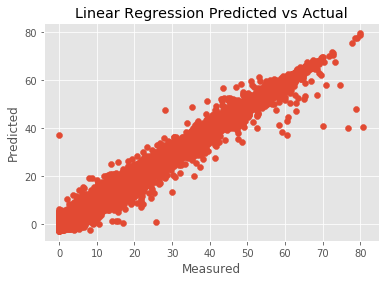

In [44]:
plt.scatter(y_test, lin_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')
plt.show()

In [45]:
### Neural Network Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create MLPRegressor object
mlp = MLPRegressor()

In [46]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
# Score the model
neural_network_regression_score = mlp.score(X_test, y_test)
neural_network_regression_score

0.9919201262827668

In [48]:
# Score the model
neural_network_regression_score = mlp.score(X_train, y_train)
neural_network_regression_score

0.9917593481132061

In [49]:
# Make predictions using the testing set
nnr_pred = mlp.predict(X_test)

In [50]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, nnr_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 1.69
Mean absolute error: 1.03
R-squared: 0.99


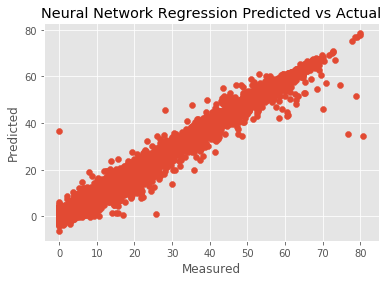

In [51]:
plt.scatter(y_test, nnr_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Neural Network Regression Predicted vs Actual')
plt.show()

In [52]:
###Lasso
from sklearn.linear_model import Lasso

lasso = Lasso()

In [53]:
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
# Score the model
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.9923086310446717

In [55]:
# Score the model
lasso_score = lasso.score(X_train, y_train)
lasso_score

0.9920410049477479

In [56]:
# Make predictions using the testing set
lasso_pred = lasso.predict(X_test)

In [57]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))

# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, lasso_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, lasso_pred))

Root mean squared error: 1.65
Mean absolute error: 0.99
R-squared: 0.99


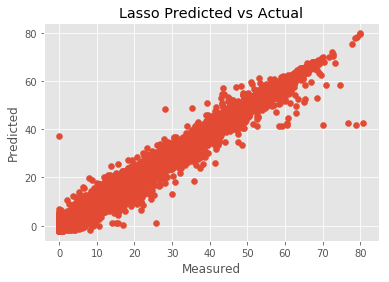

In [58]:
plt.scatter(y_test, lasso_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Lasso Predicted vs Actual')
plt.show()

In [59]:
##ElasticNet
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9923404691889874

In [61]:
elasticnet_score = elasticnet.score(X_test, y_test)
elasticnet_score

0.9923404691889874

In [62]:
elasticnet_pred = elasticnet.predict(X_test)

In [63]:
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, elasticnet_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, elasticnet_pred))

Root mean squared error: 1.64
Mean absolute error: 0.99
R-squared: 0.99


In [64]:
###Decision Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forrest Regressor object
regr_rf = RandomForestRegressor(n_estimators=200, random_state=1234)

C:\Users\Kingsley\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [65]:
# Train the model using the training sets
regr_rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [66]:
regr_rf.fit(X_test, y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [67]:
# Score the model
decision_forest_score = regr_rf.score(X_test, y_test)
decision_forest_score

0.9993148789215262

In [68]:
# Make predictions using the testing set
regr_rf_pred = regr_rf.predict(X_test)

In [69]:
from math import sqrt
# The mean squared error
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, regr_rf_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, regr_rf_pred))

Root mean squared error: 0.49
Mean absolute error: 0.27
R-squared: 1.00


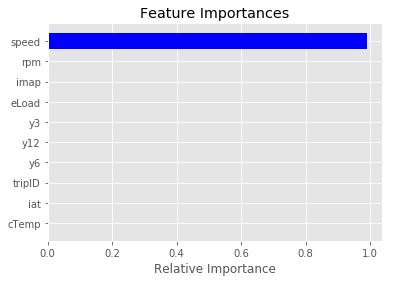

In [70]:
features = X.columns
importances = regr_rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

#Random Forest Regression show how useful they are at predicting the target variable or improve the accuracy of the model

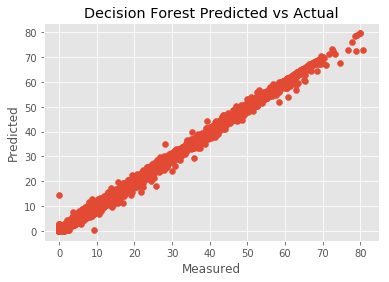

In [71]:
plt.scatter(y_test, regr_rf_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Decision Forest Predicted vs Actual')
plt.show()

In [72]:
#Extra Trees Regression

from sklearn.ensemble import ExtraTreesRegressor
extra_tree = ExtraTreesRegressor(n_estimators=200, random_state=1234)

In [73]:
extra_tree.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
          oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [74]:
extratree_score = extra_tree.score(X_test, y_test)
extratree_score

0.9953993058895532

In [75]:
extratree_score = extra_tree.score(X_train, y_train)
extratree_score

0.9999897264247072

In [76]:
extratree_pred = extra_tree.predict(X_test)

In [77]:
print("Root mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))
# The absolute squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, extratree_pred))
# Explained variance score: 1 is perfect prediction
print('R-squared: %.2f' % r2_score(y_test, extratree_pred))

Root mean squared error: 1.27
Mean absolute error: 0.70
R-squared: 1.00


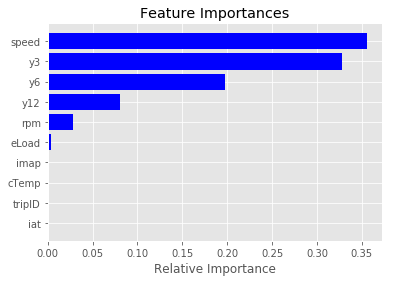

In [78]:
features = X.columns
importances = extra_tree.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

#Extra Trees Regression show how useful they are at predicting the target variable or improve the accuracy of the model


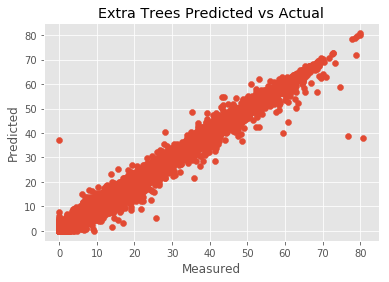

In [79]:
plt.scatter(y_test, extratree_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Extra Trees Predicted vs Actual')
plt.show()

In [80]:
#Evaluate Models
print("Scores:")
print("Linear regression score: ", linear_regression_score)
print("Neural network regression score: ", neural_network_regression_score)
print("Lasso regression score: ", lasso_score)
print("ElasticNet regression score: ", elasticnet_score)
print("Decision forest score: ", decision_forest_score)
print("Extra Trees score: ", extratree_score)
print("\n")
print("RMSE:")
print("Linear regression RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lin_pred)))
print("Neural network RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, nnr_pred)))
print("Lasso RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, lasso_pred)))
print("ElasticNet RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, elasticnet_pred)))
print("Decision forest RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, regr_rf_pred)))
print("Extra Trees RMSE: %.2f"
      % sqrt(mean_squared_error(y_test, extratree_pred)))

Scores:
Linear regression score:  0.9923194367832849
Neural network regression score:  0.9917593481132061
Lasso regression score:  0.9920410049477479
ElasticNet regression score:  0.9923404691889874
Decision forest score:  0.9993148789215262
Extra Trees score:  0.9999897264247072


RMSE:
Linear regression RMSE: 1.62
Neural network RMSE: 1.69
Lasso RMSE: 1.65
ElasticNet RMSE: 1.64
Decision forest RMSE: 0.49
Extra Trees RMSE: 1.27


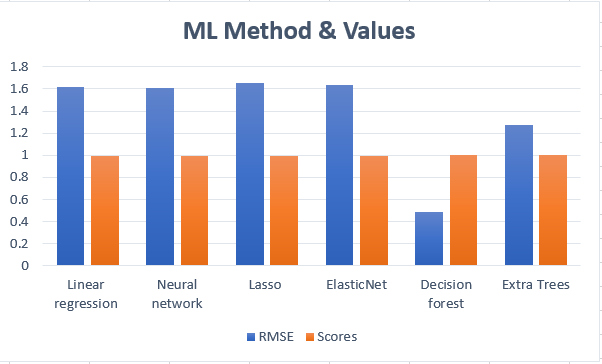

In [82]:
from IPython.display import Image
Image(filename='mmv.png')

C:\Users\Kingsley\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


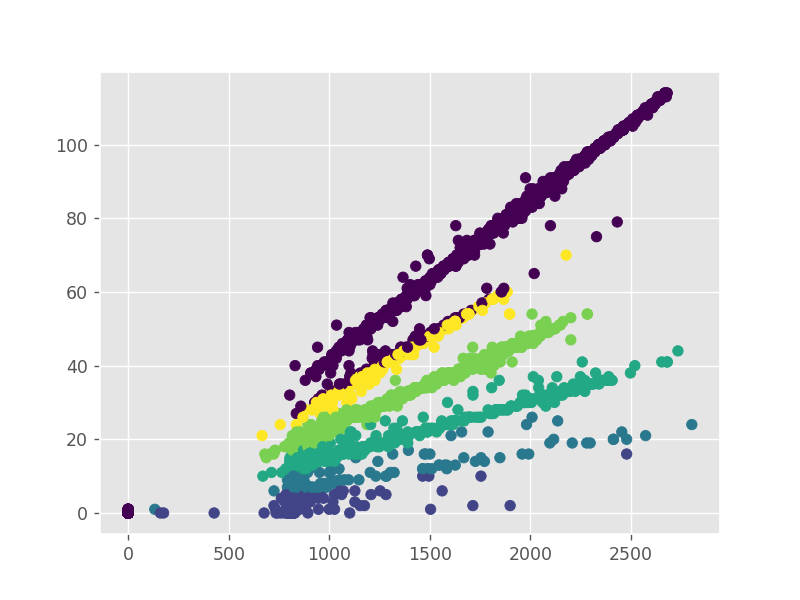

[]

In [83]:
import pandas as pd
"""
A framework script that tags the data points according to the gear and assigns it a color and plots the data. 
The gear detection is done by assuming the borders generated using any of the algorithms and placed in
the borders array. 
"""

%matplotlib notebook
import matplotlib.pyplot as plt


def get_gear(entry, borders):
    if entry['rpm'] == 0:
        return 0
    rat = entry['speed'] / entry['rpm'] * 1000
    if np.isnan(rat) or np.isinf(rat):
        return 0
    for i in range(0, len(borders)):
        if rat < borders[i] :
            return i + 1
    return 0

num_trips = 10
# Import data
df1 = pd.DataFrame(df,columns=['tripID','gps_speed','cTemp','eLoad','iat','imap','rpm','speed'])
obddata = df[df['tripID']<num_trips]

# borders = get_segment_borders(obddata)
borders = [7.070124715964856, 13.362448319790191, 19.945056624926686, 27.367647318253834, 32.17327586520911]
# The segment borders represents spaces in the data.  
#the borders creates overlaps that will show the direction of gear adjustments as the machine moves and speed.
obddata_wgears = obddata
obddata_wgears['gear'] = obddata.apply(lambda x : get_gear(x, borders), axis=1)

# print(obddata_wgears)

colors = [x * 50 for x in obddata_wgears['gear']]
plt.scatter(obddata_wgears['rpm'], obddata_wgears['speed'], c=colors)
plt.plot()